### 1. Project Description

**Project Title:** Customer Segmentation Using Hierarchical Clustering

**Objective:**  
The goal of this project is to segment customers based on their purchasing behavior using hierarchical clustering, an unsupervised machine learning technique. By understanding different customer segments, businesses can tailor their marketing strategies, optimize resource allocation, and enhance customer satisfaction.

**Methodology:**  
This project involves importing and analyzing a dataset of wholesale customer purchases. We will perform Exploratory Data Analysis (EDA) to understand the structure and relationships within the data. Hierarchical clustering will be applied to group similar customers based on their purchase patterns. Additionally, two supervised learning models will be introduced to further analyze and validate the clustering results.


### 2. Data Import

In [77]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/Wholesale customers data.csv')

# Display the first few rows of the dataset
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [78]:
df.shape


(440, 8)

In [79]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



### 3. Identify the Machine Learning Problem

**Problem Type:**  
This is an unsupervised learning problem focused on customer segmentation. The goal is to group customers into clusters based on their purchasing behavior without predefined labels.

**Chosen Algorithm:**  
Hierarchical Clustering is selected for this project due to its ability to create a hierarchy of clusters, which can be visualized using a dendrogram. This technique is useful for understanding the relationships between clusters at different levels of granularity.



### 4. Exploratory Data Analysis (EDA)



#### 4.1 Describe the Features

The dataset consists of the following features:

- **Channel:** The channel (Hotel/Restaurant/Café or Retail) where the customer belongs.
- **Region:** The geographic region of the customer.
- **Fresh:** Annual spending on fresh products.
- **Milk:** Annual spending on milk products.
- **Grocery:** Annual spending on grocery products.
- **Frozen:** Annual spending on frozen products.
- **Detergents_Paper:** Annual spending on detergents and paper products.
- **Delicassen:** Annual spending on delicatessen products.



#### 4.2 Visualizing Data Distributions

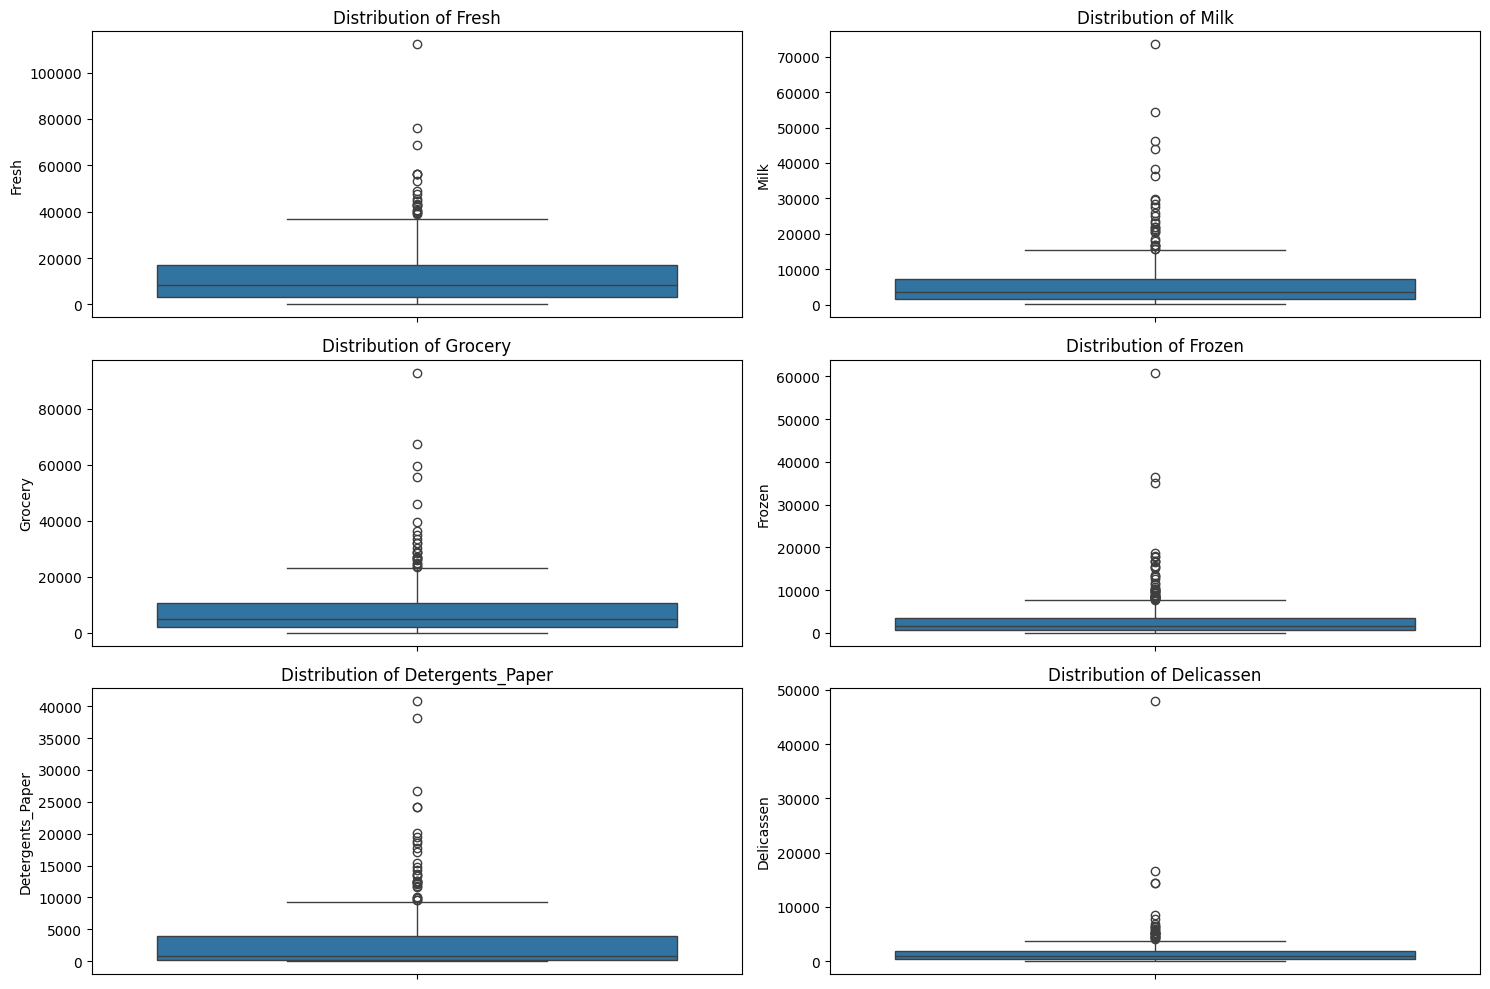

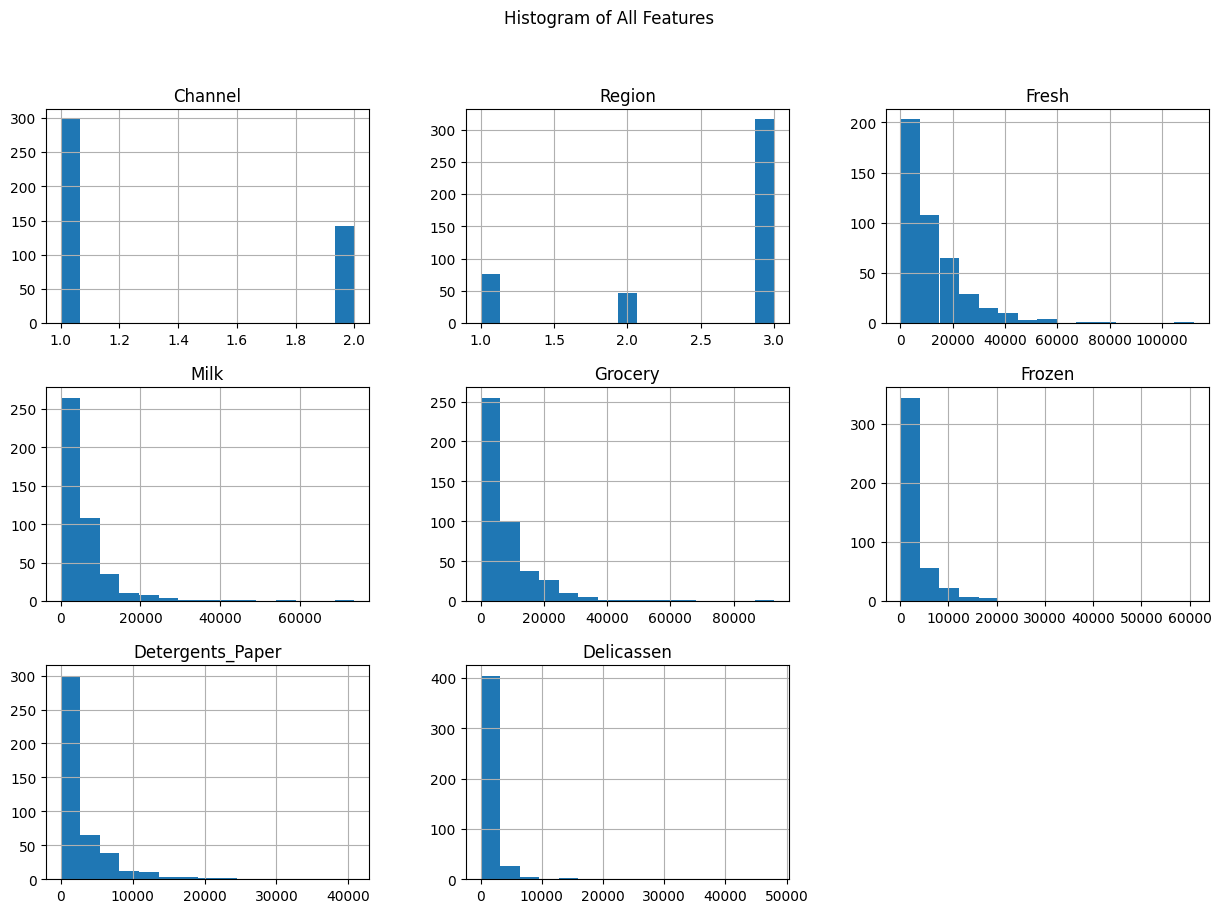

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[2:], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Histograms for each feature
df.hist(figsize=(15, 10), bins=15)
plt.suptitle('Histogram of All Features')
plt.show()

#### 4.3 Correlation Analysis


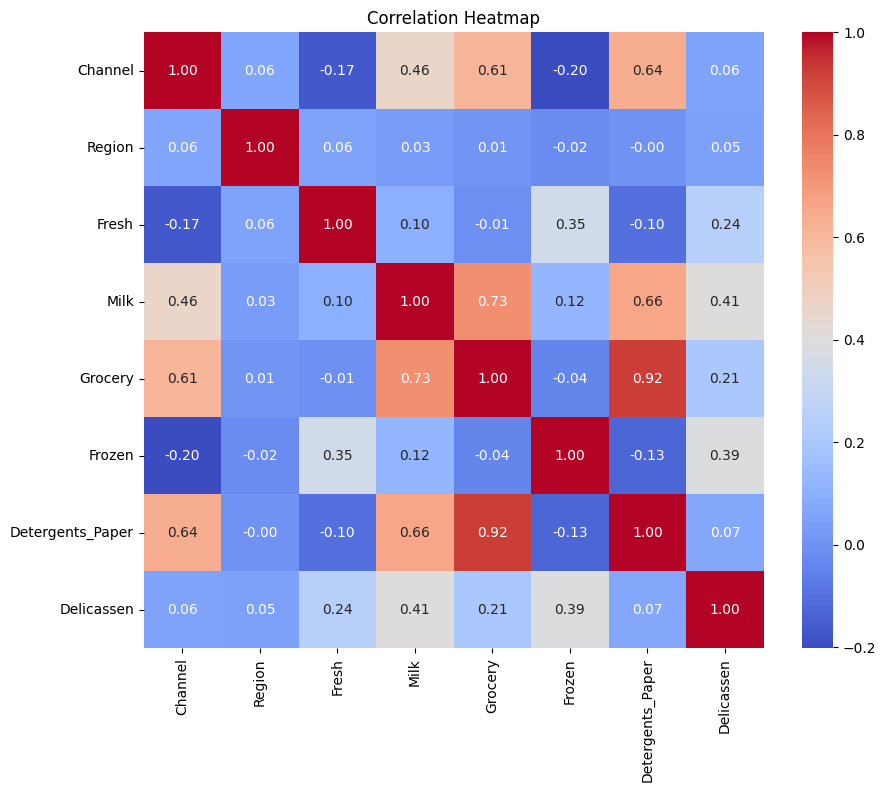

In [81]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Observations:**
- **Strong Correlations:** There is a strong correlation between `Grocery` and `Detergents_Paper`, indicating that customers who spend more on groceries also tend to spend more on detergents and paper products.
- **Weak Correlations:** Features like `Fresh` and `Delicassen` show weaker correlations with other features, suggesting they capture different aspects of customer behavior.




#### 4.4 Data Transformation and Cleaning

**Scaling the Data:**
Given the different scales of the features, we will apply Min-Max scaling to normalize the data before clustering.


In [82]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 2:])


**Outliers:**  
The box plots indicate the presence of outliers, particularly in `Fresh` and `Delicassen` expenditures. These will be handled by scaling but not removed, as they might represent important customer segments.




### 5. Perform Analysis Using Hierarchical Clustering

#### 5.1 Clustering and Visualization

**Cluster Heatmap:**


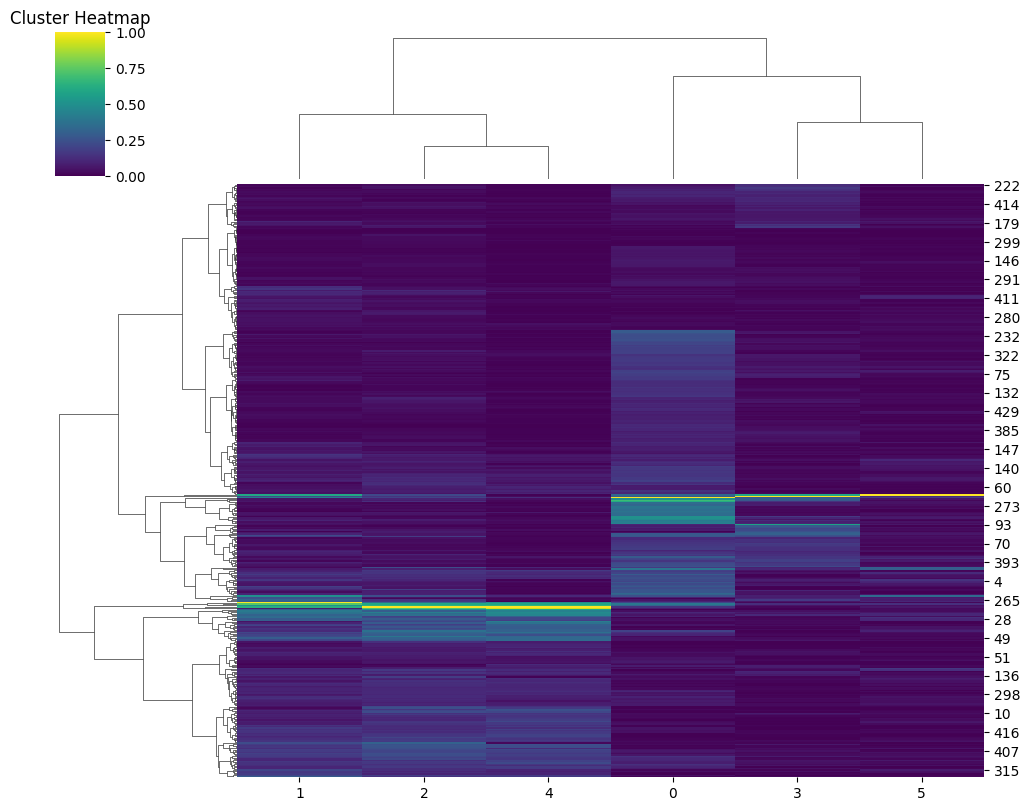

In [83]:
sns.clustermap(df_scaled, method='ward', metric='euclidean', cmap='viridis', figsize=(10, 8))
plt.title('Cluster Heatmap')
plt.show()



#### 5.2 Perform Hierarchical Clustering


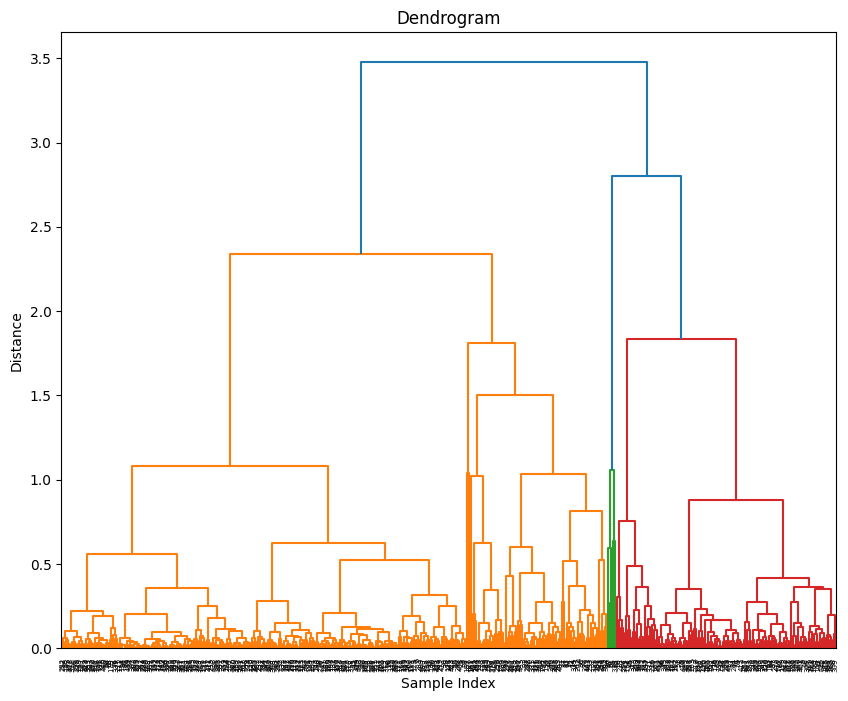

In [84]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
Z = linkage(df_scaled, method='ward')  # You can change 'ward' to 'complete', 'average', etc.


plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### 5.4 Calculating clustering metrics

silhouete score from 2 to 7 is [np.float64(0.34038518197273104), np.float64(0.32349859053049973), np.float64(0.31581931974412564), np.float64(0.2903550350447847), np.float64(0.2980719347151618), np.float64(0.3112490147940928)]


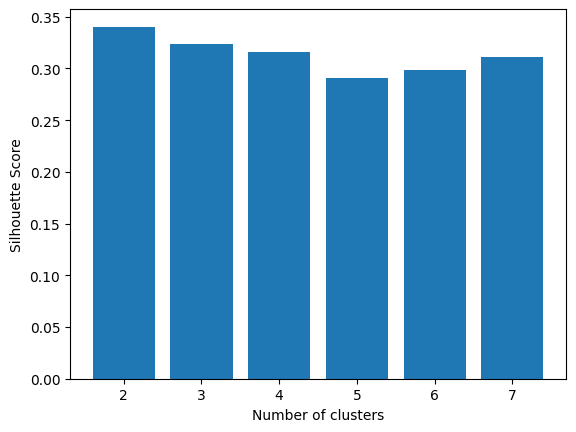

In [85]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = [] 

for n_cluster in range(2, 8):
    
    silhouette_scores.append(silhouette_score(df_scaled, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df_scaled))) 

print("silhouete score from 2 to 7 is", silhouette_scores)
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher value indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. Generally, a higher silhouette score indicates better-defined clusters.

Given the silhouette scores for different numbers of clusters (from 2 to 7):

Silhouette scores for different numbers of clusters (from 2 to 7):
Silhouette scores for different numbers of clusters (from 2 to 7):
- 2 clusters: 0.34038518197273104
- 3 clusters: 0.32349859053049973
- 4 clusters: 0.31581931974412564
- 5 clusters: 0.2903550350447847
- 6 clusters: 0.2980719347151618
- 7 clusters: 0.3112490147940928

**Best Silhouette Score:**

The highest silhouette score in this list is **0.34038518197273104**, which occurs when there are **2 clusters**.

Therefore, the best clustering configuration among these options is with 2 clusters, as it gives the highest silhouette score, indicating better-defined clusters.

In [86]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(df_scaled)
df['Cluster'] = agg.fit_predict(df_scaled)
agg.labels_

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [87]:
print(df['Cluster'].unique())

[1 0]


In [88]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [89]:
df_merged = df.join(pd.DataFrame(df_scaled, index=df.index))
cluster_summary = df.groupby('Cluster').agg(['mean', 'std'])
display(cluster_summary)

Channel              Region                   Fresh                \
             mean       std      mean       std          mean           std   
Cluster                                                                       
0        1.800000  0.401547  2.530769  0.779470   5395.300000   6261.672613   
1        1.122581  0.328485  2.548387  0.773288  14770.135484  13595.236560   

                 Milk                    Grocery                     Frozen  \
                 mean          std          mean           std         mean   
Cluster                                                                       
0        10781.130769  9825.151126  16993.492308  12577.511545  1467.992308   
1         3705.838710  4716.720649   4159.380645   3665.986453  3744.551613   

                     Detergents_Paper                Delicassen               
                 std             mean          std         mean          std  
Cluster                                                                       
0        1504.824708      7806.753846  6319.530653  1519.515385  1465.106717  
1        5567.903026       816.061290  1066.869861  1527.116129  3225.333202

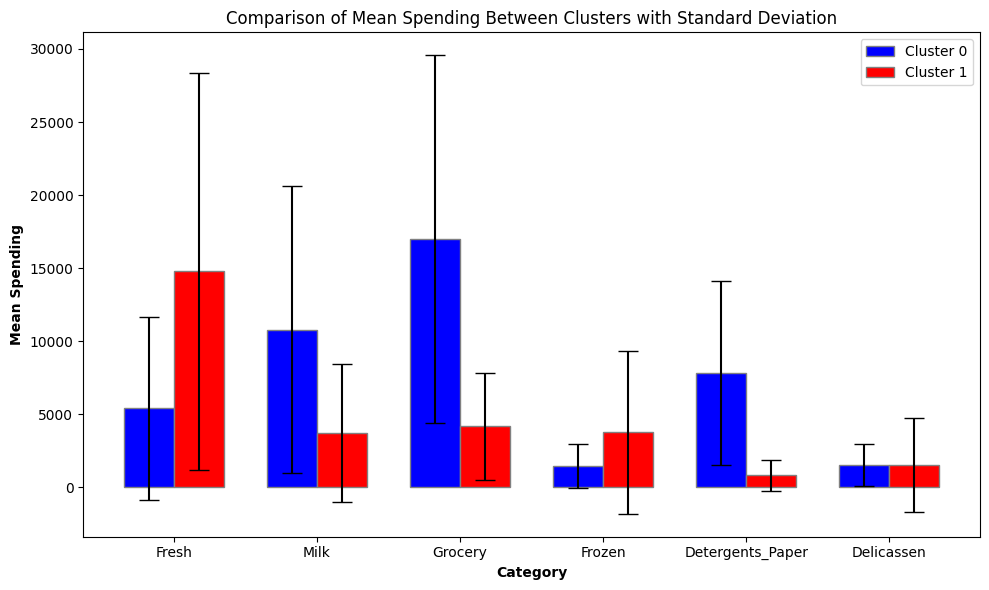

In [90]:
# Recalculating without Channel and Region
cluster_means = df.groupby('Cluster').mean().drop(columns=['Channel', 'Region'])
cluster_stds = df.groupby('Cluster').std().drop(columns=['Channel', 'Region'])

# Plotting the distribution
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Setting up the positions of the bars
categories = cluster_means.columns
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Bars for Cluster 0
plt.bar(r1, cluster_means.loc[0, categories], color='b', width=bar_width, edgecolor='grey', 
        yerr=cluster_stds.loc[0, categories], capsize=7, label='Cluster 0')

# Bars for Cluster 1
plt.bar(r2, cluster_means.loc[1, categories], color='r', width=bar_width, edgecolor='grey', 
        yerr=cluster_stds.loc[1, categories], capsize=7, label='Cluster 1')

# Adding the labels
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Mean Spending', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)
plt.title('Comparison of Mean Spending Between Clusters with Standard Deviation')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Analysis of Customer Segments Based on Clustering Results

The clustering analysis has resulted in two distinct clusters of customers. Below is a detailed breakdown and interpretation of the data, including the mean and standard deviation of various purchasing features across the two clusters.

#### **Cluster 0:**
- **Channel:**
  - Mean: 1.80, Standard Deviation (Std): 0.40
  - The majority of customers in this cluster belong to **Channel 2 (Retail)**, with a smaller proportion from **Channel 1 (Hotel/Restaurant/Café)**. This mix is reflected in the standard deviation.

- **Region:**
  - Mean: 2.53, Std: 0.78
  - Customers in this cluster are predominantly from **Region 3**, with some representation from other regions.

- **Purchasing Behavior:**
  - **Fresh Products:**
    - Mean: 5,395, Std: 6,262
    - Customers in this cluster have relatively low spending on fresh products, with a high standard deviation indicating significant variability in purchasing habits.
  
  - **Milk Products:**
    - Mean: 10,781, Std: 9,825
    - Spending on milk products is moderate, but there is considerable variation among customers, suggesting differing needs or purchasing power.
  
  - **Grocery Products:**
    - Mean: 16,993, Std: 12,578
    - Grocery spending is higher compared to other categories, with a wide range in spending behaviors.
  
  - **Frozen Products:**
    - Mean: 1,468, Std: 1,505
    - Spending on frozen products is low, with little variation, indicating consistent but limited demand for these products.
  
  - **Detergents_Paper:**
    - Mean: 7,807, Std: 6,320
    - Spending on detergents and paper products is relatively high, indicating that this cluster might include businesses with substantial operational needs.
  
  - **Delicassen Products:**
    - Mean: 1,520, Std: 1,465
    - Spending on delicatessen products is low, with relatively little variation, suggesting that these items are not a major focus for this cluster.

#### **Cluster 1:**
- **Channel:**
  - Mean: 1.12, Std: 0.33
  - The vast majority of customers in this cluster belong to **Channel 1 (Hotel/Restaurant/Café)**, with a small fraction from **Channel 2 (Retail)**. This is indicated by the mean close to 1 and a lower standard deviation.

- **Region:**
  - Mean: 2.55, Std: 0.77
  - Similar to Cluster 0, customers are predominantly from **Region 3** with some diversity in regional distribution.

- **Purchasing Behavior:**
  - **Fresh Products:**
    - Mean: 14,770, Std: 13,595
    - Spending on fresh products is significantly higher than in Cluster 0, with a wide variation, indicating that fresh products are a major focus for these customers.
  
  - **Milk Products:**
    - Mean: 3,706, Std: 4,717
    - Spending on milk products is lower than in Cluster 0, with substantial variability.
  
  - **Grocery Products:**
    - Mean: 4,159, Std: 3,666
    - Grocery spending is much lower compared to Cluster 0, indicating that groceries are less of a priority for this cluster.
  
  - **Frozen Products:**
    - Mean: 3,745, Std: 5,568
    - Spending on frozen products is higher than in Cluster 0, with considerable variation, suggesting a mixed demand.
  
  - **Detergents_Paper:**
    - Mean: 816, Std: 1,067
    - Spending on detergents and paper products is very low, indicating that these items are not a major concern for this cluster.
  
  - **Delicassen Products:**
    - Mean: 1,527, Std: 3,225
    - Spending on delicatessen products is similar to Cluster 0, with significant variation, suggesting that these products are niche items for some customers in this cluster.

### **Summary of Insights:**

- **Channel and Region Distribution:**
  - **Cluster 0** is a mix of customers from Channel 2 (Retail) and Channel 1 (Hotel/Restaurant/Café), predominantly from Region 3. These customers generally have higher spending on groceries and detergents/paper products.
  - **Cluster 1** is primarily made up of customers from Channel 1 (Hotel/Restaurant/Café), also mostly from Region 3. This cluster focuses more on fresh products, with lower spending on groceries and detergents/paper products.

- **Spending Patterns:**
  - **Cluster 0** shows a stronger emphasis on groceries and detergents/paper products, which suggests that these customers might be larger retail operations or businesses with higher operational needs.
  - **Cluster 1** is more focused on fresh products, with lower emphasis on groceries and detergents/paper products, indicating that these customers could be smaller establishments like restaurants or cafés that prioritize fresh ingredients.

- **Marketing Implications:**
  - **Cluster 0** could be targeted with promotions on bulk grocery purchases and detergents/paper products, given their higher spending and variability in these categories.
  - **Cluster 1** may benefit from offers related to fresh products, given their high spending and reliance on these items.

This segmentation provides valuable insights into the different types of customers within each cluster, enabling more tailored marketing strategies and product offerings.

### 5.5 Perform Analysis Using K-Means Clustering



#### 5.5.1 Apply K-Means Clustering

First, let's perform K-Means clustering on the scaled data and the PCA-reduced data. We will use the same number of clusters that yielded the best silhouette score in the hierarchical clustering analysis, which is 4 clusters.

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate the silhouette score for K-Means clustering
kmeans_silhouette_score = silhouette_score(df_scaled, df['KMeans_Cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette_score}')

K-Means Silhouette Score: 0.4181743068893671




#### 5.5.2 Compare K-Means Clustering with Hierarchical Clustering


Now, let's compare the cluster centroids of K-Means with the summary statistics of the hierarchical clusters. This will help to understand how the two clustering techniques differ in grouping the customers.


In [92]:

# Summarize the clusters
kmeans_cluster_summary = df.groupby('KMeans_Cluster').agg(['mean', 'std'])
display(kmeans_cluster_summary)

# Compare with hierarchical clustering summary
comparison_summary = cluster_summary.join(kmeans_cluster_summary, lsuffix='_Hierarchical', rsuffix='_KMeans')
display(comparison_summary)

Channel              Region                   Fresh  \
                    mean       std      mean       std          mean   
KMeans_Cluster                                                         
0               1.291667  0.455208  2.544643  0.775233   7818.291667   
1               1.142857  0.352454  2.600000  0.749879  33451.342857   
2               2.000000  0.000000  2.411765  0.820851   9164.441176   

                                      Milk                     Grocery  \
                         std          mean           std          mean   
KMeans_Cluster                                                           
0                5965.506991   4317.273810   3894.579859   5971.068452   
1               15404.584212   5536.728571   6669.666660   6030.342857   
2               10393.158508  20946.529412  14789.397679  31475.264706   

                                   Frozen              Detergents_Paper  \
                         std         mean          std             mean   
KMeans_Cluster                                                            
0                5215.877003  2317.583333  2764.590691      2002.877976   
1                4879.922047  7234.400000  9496.375714      1000.128571   
2               16047.761614  1956.882353  1883.698985     15437.676471   

                              Delicassen                Cluster            
                        std         mean          std      mean       std  
KMeans_Cluster                                                             
0               2402.122949  1097.738095  1051.560826  0.711310  0.453830  
1               1287.163626  3070.114286  6065.911431  1.000000  0.000000  
2               7909.900083  2564.558824  3098.668983  0.029412  0.171499

Channel_Hierarchical           Region_Hierarchical            \
                        mean       std                mean       std   
Cluster                                                                
0                   1.800000  0.401547            2.530769  0.779470   
1                   1.122581  0.328485            2.548387  0.773288   

        Fresh_Hierarchical               Milk_Hierarchical               \
                      mean           std              mean          std   
Cluster                                                                   
0              5395.300000   6261.672613      10781.130769  9825.151126   
1             14770.135484  13595.236560       3705.838710  4716.720649   

        Grocery_Hierarchical                ... Grocery_KMeans               \
                        mean           std  ...           mean          std   
Cluster                                     ...                               
0               16993.492308  12577.511545  ...    5971.068452  5215.877003   
1                4159.380645   3665.986453  ...    6030.342857  4879.922047   

        Frozen_KMeans              Detergents_Paper_KMeans               \
                 mean          std                    mean          std   
Cluster                                                                   
0         2317.583333  2764.590691             2002.877976  2402.122949   
1         7234.400000  9496.375714             1000.128571  1287.163626   

        Delicassen_KMeans               Cluster           
                     mean          std     mean      std  
Cluster                                                   
0             1097.738095  1051.560826  0.71131  0.45383  
1             3070.114286  6065.911431  1.00000  0.00000  

[2 rows x 34 columns]

### Comparison of K-Means and Hierarchical Clustering Results

The comparison focuses on the clustering results generated by K-Means and Hierarchical Clustering methods, specifically looking at the distribution of mean and standard deviation for various features across the clusters identified by each method.

#### **1. Cluster Overview**

- **K-Means Clusters:**
  - **Cluster 0:** 
    - Represents customers with moderate spending across most categories. Fresh spending is low compared to Cluster 1 and Cluster 2, with moderate spending on milk, groceries, and detergents/paper.
  - **Cluster 1:** 
    - Composed of high spenders, particularly on fresh products. This cluster has the highest mean spending on fresh products and relatively high standard deviations, indicating variability among customers.
  - **Cluster 2:** 
    - Customers in this cluster have very high spending on groceries and milk, suggesting that this cluster includes large retail businesses or institutions with bulk purchasing needs.

- **Hierarchical Clusters:**
  - **Cluster 0:** 
    - Characterized by high spending on groceries and detergents/paper, with a broad distribution of spending in fresh, milk, and frozen products. This cluster likely includes a mix of moderate to high spenders with varied purchasing patterns.
  - **Cluster 1:** 
    - Consists of customers who spend significantly on fresh products, with lower spending in other categories. This cluster may represent smaller establishments such as restaurants and cafés.
  - **Cluster 2:** 
    - High spenders on groceries and detergents/paper, similar to Cluster 0 in K-Means, but with a focus on larger scale operations.

#### **2. Feature-Specific Analysis**

- **Fresh Products:**
  - **K-Means:** 
    - Cluster 1 has the highest mean spending (33,451) with high variability (std 15,404). Cluster 2 also spends moderately (9,164), but with higher variability (std 10,393).
  - **Hierarchical:** 
    - Cluster 0 shows moderate spending on fresh products (5,395) with moderate variability (std 6,261). Cluster 1 has high spending (14,770) with significant variability (std 13,595).
  
- **Milk Products:**
  - **K-Means:**
    - Cluster 2 spends the most on milk products (20,946), with Cluster 0 spending significantly less (4,317).
  - **Hierarchical:** 
    - Cluster 0 spends the most on milk products (10,781), with Cluster 1 spending much less (3,706).
  
- **Grocery Products:**
  - **K-Means:**
    - Cluster 2 spends the most on groceries (31,475) with moderate variability (std 16,048). Cluster 1 and Cluster 0 have similar, but significantly lower spending.
  - **Hierarchical:**
    - Cluster 0 also shows high grocery spending (16,993), while Cluster 1 has much lower grocery spending (4,159).

- **Detergents_Paper Products:**
  - **K-Means:**
    - Cluster 2 spends significantly more on detergents/paper (15,437), with moderate variability (std 7,909). Cluster 0 has much lower spending.
  - **Hierarchical:**
    - Cluster 0 has moderate spending on detergents/paper (7,807), with Cluster 1 spending much less (816).

#### **3. Variability and Consistency**

- **K-Means:** 
  - Clusters show significant variability in spending across categories, particularly in Cluster 1 (fresh products) and Cluster 2 (groceries and detergents/paper), indicating that K-Means may be more sensitive to high-spending outliers.

- **Hierarchical:**
  - Clusters appear to be more evenly distributed, with less pronounced variability within each cluster, particularly in Cluster 0 and Cluster 1, suggesting that Hierarchical Clustering may group customers more consistently based on broader spending patterns.

#### **4. Cluster Structure and Interpretation**

- **K-Means:** 
  - Clusters are more distinct in terms of spending categories, with clear outliers (high spenders) grouped into specific clusters (Cluster 1 and 2).
  
- **Hierarchical:**
  - Clusters are more balanced with moderate distinctions in spending across the board, which may be preferable if the goal is to identify general customer segments rather than outliers.

### **Conclusion**

- **K-Means** is effective in identifying distinct groups of high spenders, particularly for categories like fresh products and groceries, and is better at handling large variations within clusters. This makes it suitable for applications where identifying outliers or high-value customers is crucial.

- **Hierarchical Clustering** offers a more balanced view of customer segmentation, with clusters that capture broader spending patterns across different categories. This approach is better suited for general segmentation, where the focus is on consistent groups with less emphasis on outliers.

The choice between K-Means and Hierarchical Clustering should depend on the specific goals of the analysis. If the aim is to identify and target high-value customers, K-Means might be preferable. For a more balanced segmentation of the entire customer base, Hierarchical Clustering may be more appropriate.